In [1]:
#2x2x2 Rubics cube optimal solution finder:
import numpy as np
from copy import deepcopy

class RubicsCube:
    
    colors = ['orange','red','green','blue','yellow','white']
    
    def __lt__(self, other):
        return self
    
    def __init__(self):
        self.id_ = 0
        
    def get_id(self):
        self.id_ += 1
        return self.id_
    
    class Face:
        def __init__(self,color, cube):
            self.cube = cube
            self.color = color
        
        def matrix_representation(self):
            
            p1 = self.Piece(self.color,self.cube.get_id())
            p2 = self.Piece(self.color,self.cube.get_id())
            p3 = self.Piece(self.color,self.cube.get_id())
            p4 = self.Piece(self.color,self.cube.get_id())

            return np.array([[p1,p2],[p3,p4]])
        
        class Piece:

            def __init__(self, color, id_):
                self.color = color
                self.id_ = id_

            def assign_neighbours(self, LN, RN, TN, BN, true_N, bind_1=None, bind_2=None):
                if(true_N):
                    self.true_LN = LN
                    self.true_RN = RN
                    self.true_TN = TN
                    self.true_BN = BN
                    self.bind_1 = bind_1
                    self.bind_2 = bind_2
                else:
                    #fix order, sync
                    true_l = [self.true_LN.id_,self.true_TN.id_,self.true_RN.id_,self.true_BN.id_]
                    l = [LN,TN,RN,BN]
                    bind_1_index = true_l.index(self.bind_1.id_)
                    bind_2_index = true_l.index(self.bind_2.id_)
    
                    counter = 0
                    while((true_l[bind_1_index] != l[bind_1_index].id_ or true_l[bind_2_index] != l[bind_2_index].id_)
                          and (true_l[bind_2_index] != l[bind_1_index].id_ or true_l[bind_1_index] != l[bind_2_index].id_)
                          and counter < 4):
                        l = l[1:] + [l[0]]
                        counter += 1 
                        
                    self.LN = l[0]
                    self.TN = l[1]
                    self.RN = l[2]
                    self.BN = l[3]
    
        #LN, RN, TN, BN
            def get_wrong_neighbours_count(self):
                
                summa = (self.equals(self.true_LN.id_, self.LN.id_) + self.equals(self.true_RN.id_, self.RN.id_) + self.equals(self.true_TN.id_, self.TN.id_) + self.equals(self.true_BN.id_, self.BN.id_))/2
                return (self.equals(self.true_LN.id_, self.LN.id_) + self.equals(self.true_RN.id_, self.RN.id_) + self.equals(self.true_TN.id_, self.TN.id_) + self.equals(self.true_BN.id_, self.BN.id_))/2
                
            def equals(self,true_N, N):
                if(true_N == N):
                    return 0
                return 1
            
    def generate_cube(self):
        self.faces = [self.Face(color, self) for color in self.colors]
        self.array_representation = np.array([face.matrix_representation() for face in self.faces])
        self.update_faces(True)
        
    def get_faces(self):
        return self.array_representation
    
    def build_from_array(self, array):
        self.generate_cube()
        self.update_faces(True)
        self.array_representation = array
        self.update_faces(False)

    def get_id_tuple(self):
        return tuple(np.array([i.id_ for i in self.array_representation.flatten()]))
    
    #shape (2,2)
    def read_in_face(self,faces_info, true_N):
        base = faces_info['base']
        LN = faces_info['LN']
        RN = faces_info['RN']
        TN = faces_info['TN']
        BN = faces_info['BN']
        
        #TL
        TL = base[0][0]
        #TR
        TR = base[0][1]
        #BL
        BL = base[1][0]
        #BR
        BR = base[1][1]
        
        # LN, RN, TN, BN,
        TL.assign_neighbours(LN[0][1],TR,TN[1][0],BL,true_N,LN[0][1],TN[1][0])
        TR.assign_neighbours(TL,RN[0][0],TN[1][1],BR,true_N,RN[0][0],TN[1][1])
        BL.assign_neighbours(LN[1][1],BR,TL,BN[0][0],true_N,LN[1][1],BN[0][0])
        BR.assign_neighbours(BL,RN[1][0],TR,BN[0][1],true_N,RN[1][0],BN[0][1])
        
    #shape (6,2,2)
    def update_faces(self, true_N,array=None):
        if(array is None):
            array=self.array_representation
        #2
        self.read_in_face({"base": array[2], "LN": array[1], "RN": array[3],"BN": array[4],"TN": array[0]},true_N)
        
        #0 
        self.read_in_face({"base": array[0], "LN": np.flip(array[1].T, 1), "RN": np.flip(array[3].T,0),"BN": array[2],"TN": array[5]},true_N)
        
        #4
        self.read_in_face({"base": array[4], "LN": np.flip(array[1].T, 0), "RN": np.flip(array[3].T,1),"BN": array[5],"TN": array[2]},true_N)
    
        #5
        self.read_in_face({"base": array[5], "LN": np.flip(np.flip(array[1],0),1), "RN": np.flip(np.flip(array[3],0),1),"BN": array[0],"TN": array[4]},true_N)
        
        #1
        self.read_in_face({"base": array[1], "LN": np.flip(np.flip(array[5],0),1), "RN": array[2],"BN": np.flip(array[4].T,1),"TN": np.flip(array[0].T,0)},true_N)
        
        #3
        self.read_in_face({"base": array[3], "LN": array[2], "RN": np.flip(np.flip(array[5],0),1),"BN": np.flip(array[4].T,0),"TN": np.flip(array[0].T,1)},true_N)
        
    def get_mistakes(self):
        return sum([f.get_wrong_neighbours_count() for f in self.array_representation.flatten()])
    
    def right_turn(self):
        faces = self.array_representation
        #save_for_later = deepcopy(faces[1][0])
        save_for_later = faces[1][0].copy()
        faces[1][0] = np.flip(faces[5][1], 0) 
        faces[5][1] = np.flip(faces[3][0],0)
        faces[3][0] = faces[2][0]
        faces[2][0] = save_for_later
        
        faces[0] = np.flip(faces[0].T,0)
        self.array_representation = faces
        self.update_faces(False) 
        
    def left_turn(self):
        faces = self.array_representation
        save_for_later = np.flip(faces[1][0].copy(),0)
        faces[1][0] = faces[2][0]
        faces[2][0] = faces[3][0]
        #[24,23]
        faces[3][0] = np.flip(faces[5][1],0)
        faces[5][1] = save_for_later
        
        faces[0] = np.flip(faces[0].T,1)
        self.array_representation = faces
        self.update_faces(False) 
   
    def up_turn(self):
        faces = self.array_representation
        save_for_later = faces[0].T[0].copy()
        faces[0].T[0] = faces[2].T[0]
        faces[2].T[0] = faces[4].T[0]
        faces[4].T[0] = faces[5].T[0]
        faces[5].T[0] = save_for_later

        faces[1] = np.flip(faces[1].T,0)
        self.array_representation = faces
        self.update_faces(False) 
        
    def down_turn(self):
        faces = self.array_representation
        save_for_later = faces[5].T[0].copy()
        
        faces[5].T[0] = faces[4].T[0]
        faces[4].T[0] = faces[2].T[0]
        faces[2].T[0] = faces[0].T[0]
        faces[0].T[0] = save_for_later

        faces[1] = np.flip(faces[1].T, 1)

        self.array_representation = faces
        self.update_faces(False)    
     
    def right_rotate(self):
        faces = self.array_representation
        starting_face = np.flip(faces[3].T[0].copy(),0)
        faces[3].T[0] = faces[0][1]
        faces[0][1] = np.flip(faces[1].T[1],0)
        faces[1].T[1] = faces[4][0]
        faces[4][0] = starting_face
        faces[2] = np.flip(faces[2].T,1)
        
        self.array_representation = faces
        self.update_faces(False)
                
    def left_rotate(self):
        faces = self.array_representation
        starting_face = faces[1].T[1].copy()
        faces[1].T[1] = np.flip(faces[0][1],0)
        faces[0][1] = faces[3].T[0]
        faces[3].T[0] = np.flip(faces[4][0],0)
        faces[4][0] = starting_face
        faces[2] = np.flip(faces[2].T,0)
        self.array_representation = faces
        self.update_faces(False)
        
    def shuffle(self):
        for i in np.random.randint(0,6,50):
            if(i==0):
                self.up_turn()
            elif(i==1):
                self.down_turn()
            elif(i==2):
                self.left_turn()
            elif(i==3):
                self.right_turn()
            elif(i==4):
                self.right_rotate()
            elif(i==5):
                self.left_rotate()

In [90]:
from timeit import default_timer

default_timer()

18714.152814545

In [94]:
import heapq

class PocketCubeSolver:
    
    def __init__(self):
        self.states_nrs = []
        self.times = []
        self.path_lengths = []
    
    class Path:
        
        def __init__(self, string):
            self.string = string
        
        def __lt__(self, other):
            return len(self) < len(other)
        
        def __len__(self):
            return len(self.string)
        
        def __str__(self):
            return self.string
    
    
    
    # put item to the queue sorted by cube.wrong_neighbours_count as keys, items themselves arrays, if array is picked,
    # perform all possible turns on that array and add resulting array to the dict, if it is not already present there
    # 
      
    def solve(self, cube):
        start = default_timer()
        
        
        states = set()
        queue = []
        counter = 0
        solved = False
        path = self.Path("")
        mistakes = cube.get_mistakes()
    
        while(mistakes != 0.0):
            for i in np.arange(6):
                new_cube = RubicsCube()
                array_of_faces = cube.get_faces().flatten().copy()
                array_of_faces = array_of_faces.reshape((6,2,2))
                new_cube.build_from_array(array_of_faces)

                if(i==0):
                    new_cube.up_turn()
                elif(i==1):
                    new_cube.down_turn()
                elif(i==2):
                    new_cube.left_turn()
                elif(i==3):
                    new_cube.right_turn()
                elif(i==4):
                    new_cube.left_rotate()
                elif(i==5):
                    new_cube.right_rotate()

                ar = new_cube.get_id_tuple()

                if(ar not in states):
                    states.add(ar)
                    new_path = self.Path(str(path) + str(i))
                    heapq.heappush(queue,(new_cube.get_mistakes(),new_path,new_cube))
            values = heapq.heappop(queue)
            mistakes = values[0]
            cube = values[2]
            counter += 1
            path = values[1]
            
        self.times.append(default_timer()-start)
        self.states_nrs.append(len(states))
        self.path_lengths.append(len(path))
            
        return str(path)


In [ ]:
pcs = PocketCubeSolver()

cube = RubicsCube()
cube.generate_cube()
for i in np.arange(100):
    cube.shuffle()
    pcs.solve(cube)


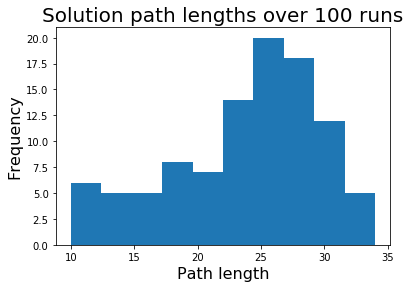

In [180]:
data = pd.DataFrame(np.array([pcs.path_lengths,pcs.states_nrs,pcs.times]).T, columns=[["path_length",'states_checked','solving_time']])
ax =data['path_length'].plot(kind='hist', title="Solution path lengths over 100 runs",legend=False)
ax.set_title("Solution path lengths over 100 runs", fontsize=20)
ax.set_xlabel("Path length",fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)
fig = ax.get_figure()
fig.savefig("path_lengths")

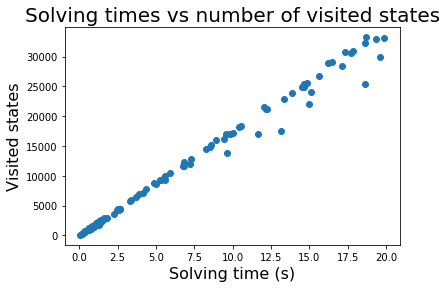

In [183]:
import matplotlib.pyplot as plt
plt.scatter(data['solving_time'].values,data['states_checked'].values)
plt.xlabel("Solving time (s)", fontsize=16)
plt.ylabel("Visited states",fontsize=16)
plt.title("Solving times vs number of visited states",fontsize=20)
plt.savefig("times")

In [99]:
pcs.path_lengths, pcs.states_nrs, pcs.times

([26,
  32,
  10,
  26,
  14,
  30,
  30,
  26,
  28,
  32,
  18,
  30,
  20,
  24,
  20,
  26,
  28,
  26,
  30,
  24,
  30,
  26,
  28,
  10,
  10,
  22,
  14,
  18,
  24,
  32,
  28,
  28,
  28,
  28,
  22,
  34,
  12,
  28,
  16,
  22,
  20,
  28,
  30,
  12,
  22,
  20,
  20,
  28,
  14,
  24,
  30,
  30,
  30,
  26,
  24,
  18,
  28,
  24,
  26,
  16,
  14,
  34,
  20,
  26,
  30,
  18,
  22,
  26,
  30,
  16,
  22,
  14,
  26,
  28,
  16,
  20,
  24,
  12,
  30,
  18,
  16,
  26,
  28,
  26,
  26,
  26,
  26,
  26,
  18,
  26,
  28,
  18,
  18,
  28,
  26,
  24,
  28,
  28,
  28,
  26],
 [8741,
  33234,
  620,
  18400,
  2179,
  28901,
  18162,
  28418,
  9655,
  30706,
  754,
  4419,
  15925,
  12251,
  7774,
  2524,
  21466,
  9367,
  29069,
  21163,
  25446,
  32968,
  22888,
  1162,
  81,
  4291,
  2447,
  1203,
  10407,
  32204,
  24992,
  17166,
  17045,
  16975,
  8646,
  23904,
  253,
  26778,
  2056,
  3579,
  960,
  25459,
  21261,
  394,
  2346,
  2289,
  2897,
  1199

In [4]:
hepa = []
s = "a"
heapq.heappush(hepa, (1,s))
heapq.heappush(hepa, (2,s))
s2 = heapq.heappop(hepa)[1]
s2 += "s"
heapq.heappush(hepa, (3,s2))
heapq.heappop(hepa)

(2, 'a')

In [85]:
import tkinter
import time

top = tkinter.Tk()
height = 800
width = 500  


canvas = tkinter.Canvas(top, height=height, width=width)

id1 = canvas.create_rectangle(width//2-60,100,width//2,160)
id2 = canvas.create_rectangle(width//2,100,width//2+60,160)
id3 = canvas.create_rectangle(width//2-60,160,width//2,220)
id4 = canvas.create_rectangle(width//2,160,width//2+60,220)

id5 = canvas.create_rectangle(width//2-180,220,width//2-60,280)
id6 = canvas.create_rectangle(width//2-120,220,width//2-60,280)
id7 = canvas.create_rectangle(width//2-180,280,width//2-60,340)
id8 = canvas.create_rectangle(width//2-120,280,width//2-60,340)

id9 = canvas.create_rectangle(width//2-60,220,width//2,280)
id10 = canvas.create_rectangle(width//2,220,width//2+60,280)
id11 = canvas.create_rectangle(width//2-60,280,width//2,340)
id12 = canvas.create_rectangle(width//2,280,width//2+60,340)

id13 = canvas.create_rectangle(width//2+60,220,width//2+120,280)
id14 = canvas.create_rectangle(width//2+120,220,width//2+180,280)
id15 = canvas.create_rectangle(width//2+60,280,width//2+120,340)
id16 = canvas.create_rectangle(width//2+120,280,width//2+180,340)

id17= canvas.create_rectangle(width//2-60,340,width//2,400)
id18 = canvas.create_rectangle(width//2,340,width//2+60,400)
id19 = canvas.create_rectangle(width//2-60,400,width//2,460)
id20 = canvas.create_rectangle(width//2,400,width//2+60,460)

id21 = canvas.create_rectangle(width//2-60,460,width//2,520)
id22 = canvas.create_rectangle(width//2,460,width//2+60,520)
id23 = canvas.create_rectangle(width//2-60,520,width//2,580)
id24 = canvas.create_rectangle(width//2,520,width//2+60,580)

tiles = np.array([[[id1,id2],[id3,id4]],[[id5,id6],[id7,id8]],[[id9,id10],[id11,id12]],
          [[id13,id14],[id15,id16]],[[id17,id18],[id19,id20]],[[id21,id22],[id23,id24]]])

cube = RubicsCube()
cube.generate_cube()
cube.shuffle()
# cube.update_faces(True)
# cube.update_faces(False)
#cube.right_turn()
pcs = PocketCubeSolver()

path = pcs.solve(cube)
print(path)
print(len(path))
canvas.pack()
# top.mainloop()



for i in path:
    if(i=="0"):
        cube.up_turn()
    elif(i=="1"):
        cube.down_turn()
    elif(i=="2"):
        cube.left_turn()
    elif(i=="3"):
        cube.right_turn()
    elif(i=="4"):
        cube.left_rotate()
    elif(i=="5"):
        cube.right_rotate()

    faces = cube.get_faces()
    tiles_faces = dict()
    for tile,face in zip(tiles, faces):
        for t, f in zip(tile.flatten(),face.flatten()):
            tiles_faces[t] = f

    for key in tiles_faces.keys():
        canvas.itemconfig(key, fill = tiles_faces[key].color)

    top.update_idletasks()
    top.update()
    time.sleep(0.05)
time.sleep(10)
top.destroy()


#         canvas.create_text((canvas.coords(key)[0]+10, canvas.coords(key)[1]+10), text=str(tiles_faces[key].id_))
#     #     print(str(key) + ": LN " + tiles_faces[key].true_LN.color +", RN " + tiles_faces[key].RN.color +", BN " + tiles_faces[key].BN.color
#     #          +", TN " + tiles_faces[key].TN.color)
    
    

24404124214041505513034124
26
